# Non-linear regression

Despite the fact that both of our examples so far have involved **linear** data, we have already made use of the `curve_fit` function, which is capable of fitting **non-linear** data: let's have a look at a **non-linear** example:

In [1]:
%config InlineBackend.figure_format='retina'

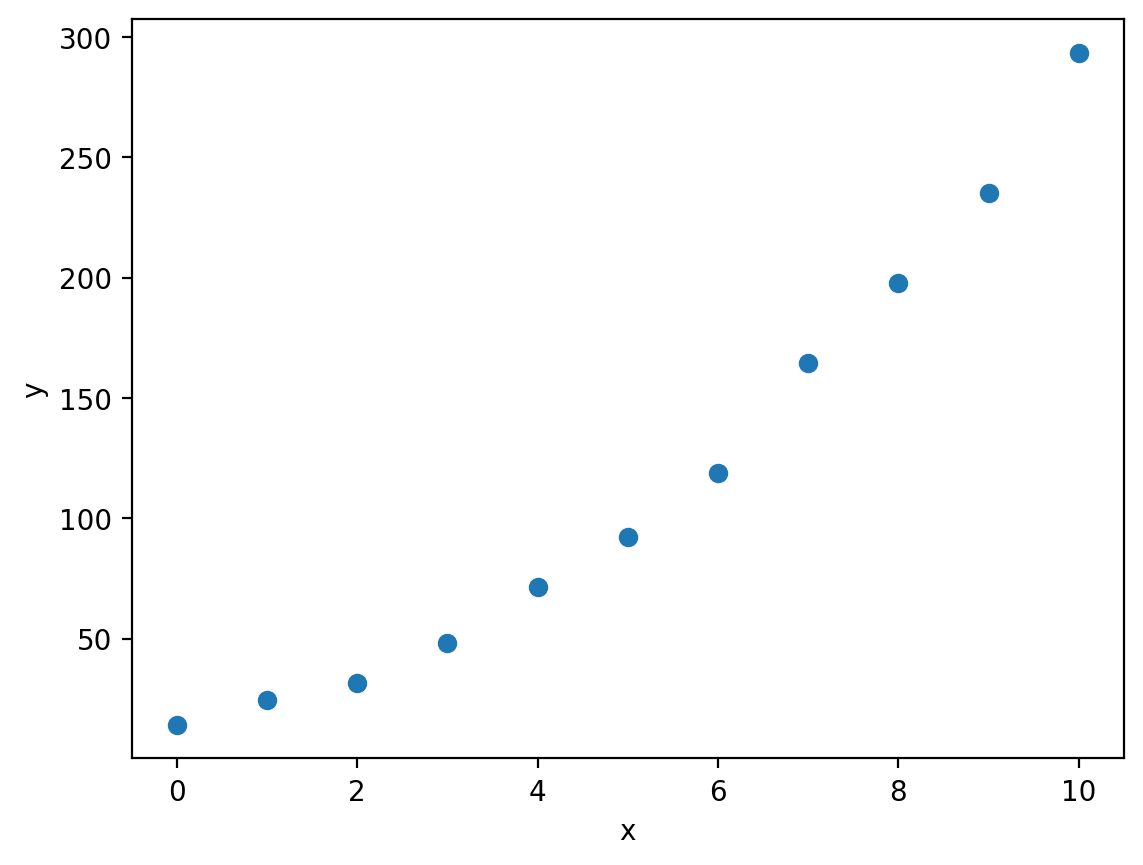

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x, y = np.loadtxt('non_linear.csv', delimiter=',', unpack=True)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

You can download non_linear.csv [here](https://raw.githubusercontent.com/pythoninchemistry/ch12004/main/CH12004/lab_6/non_linear.csv).

Here we have some data which looks to be **quadratic**, so let's try to fit an quadratic **model** using `curve_fit`. First we need to define a **function** that represents the model we would like to fit. If we are trying to fit an quadratic curve, then mathematically we can define this as:

$$y = ax^{2} + bx + c$$

Let's write a function to Python-ise this:

In [3]:
def quadratic(x, a, b, c):
    """Calculate y = ax^2 + bx + c (a quadratic equation).

    Args:
        x (np.ndarray): A numpy array containing the x-values.
        a (float): The x^2 coefficient.
        b (float): The x coefficient.
        c (float): The additive constant.

    Returns:
        np.ndarray: The y-values.
        
    """

    return a * x ** 2 + b * x + c

Now we can use `curve_fit` just like we did for the linear examples:

In [4]:
from scipy.optimize import curve_fit

optimised_parameters, covariance_matrix = curve_fit(quadratic, x, y)

By extracting the optimised values of $a$, $b$ and $c$ from `optimised_parameters` (notice that here we have used **multiple assignment** to separate the optimised parameters from the covariance matrix without having to use list slicing), we can plot our fitted quadratic against the experimental data:

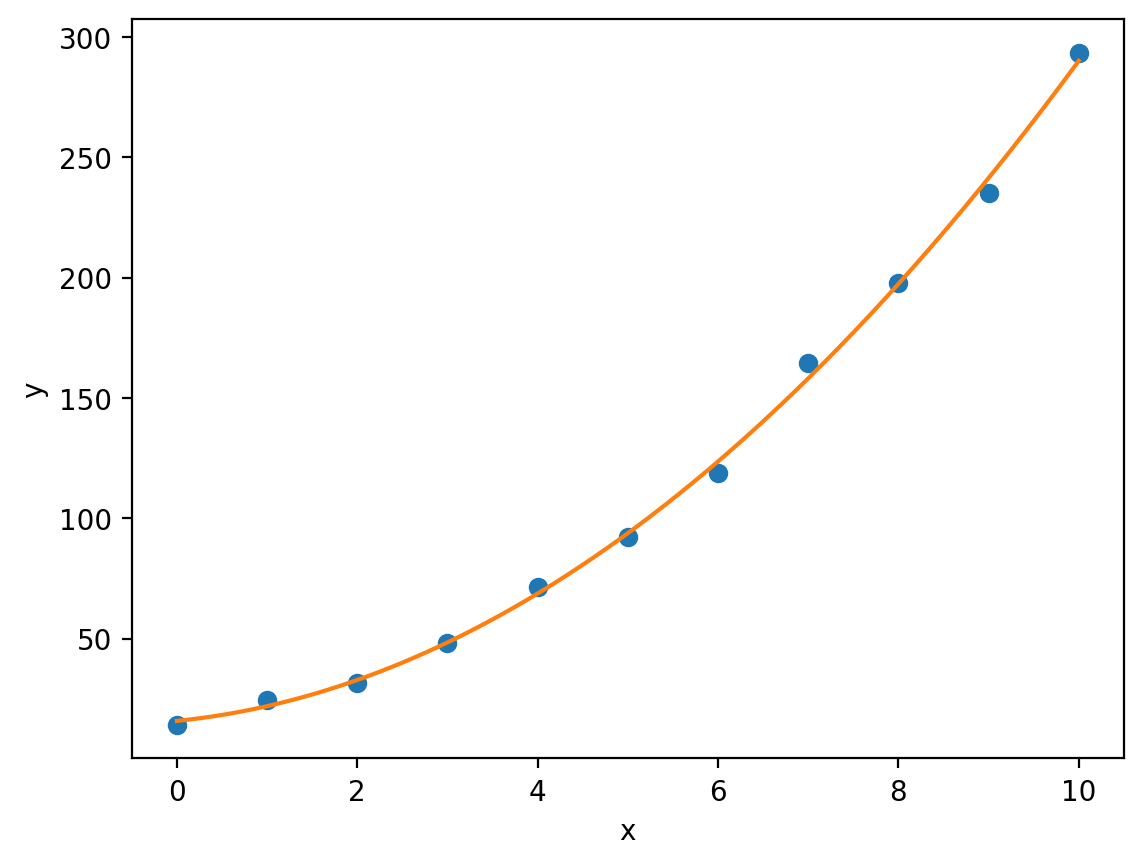

In [5]:
a, b, c = optimised_parameters
x_model = np.linspace(min(x), max(x), 1000)
y_model = quadratic(x_model, a, b, c) # Using x_model rather than x to evaluate the curve at many more points (smoother curve).

plt.plot(x, y, 'o', label='Experimental data')
plt.plot(x_model, y_model, label='Quadratic model')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

```{note}
You may have noticed the `min` and `max` functions in the code above. As you can probably imagine, the `min` function returns the **smallest** value in a sequence, whereas the `max` function returns the **largest** value.
```

Notice that here we have created a variable `x_model` which is a `numpy` array of evenly spaced values between the minimum experimental $x$-value `min(x)` and the maximum experimental $x$-value `max(x)`. This allows us to plot our model quadratic curve **smoothly**. Had we used the original `x` variable, our curve would look **jagged** (as `matplotlib` really just joins points in sequence to form a line, more points = smoother curve).

Again we can access the errors in our model parameters (this time without taking into account experimental uncertainties) by looking at the diagonal of the covariance matrix:

In [6]:
a_error = np.sqrt(covariance_matrix[0,0])
b_error = np.sqrt(covariance_matrix[1,1])
c_error = np.sqrt(covariance_matrix[2,2])

print(f'a = {a} +/- {a_error}')
print(f'b = {b} +/- {b_error}')
print(f'c = {c} +/- {c_error}')

a = 2.3654895104924902 +/- 0.14021486978893957
b = 3.769741258747288 +/- 1.4558057436891656
c = 15.782797202829471 +/- 3.1290225183638407


---

Just like our linear examples, if we have information about the uncertainties in our experimental measurements, we can plot these using the `errorbar` function:

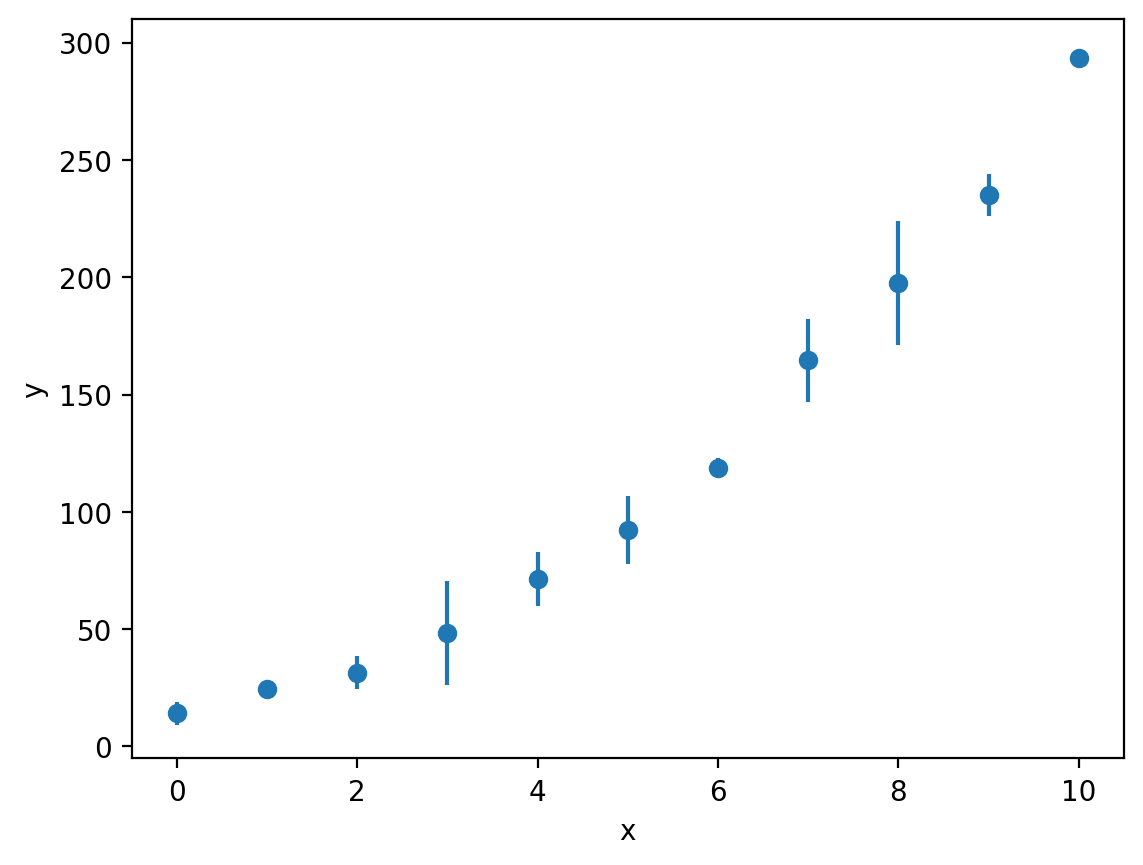

In [7]:
y_err = [4.97, 0.785, 7.10, 22.1, 11.5, 14.6, 3.93, 17.8, 26.4, 8.79, 2.31]

plt.errorbar(x, y, y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

We can then fit our quadratic model to this data and use the `sigma` keyword (the weighted least-squares method) to account for the uncertainties and propagate these through to the standard errors on $a$, $b$ and $c$:

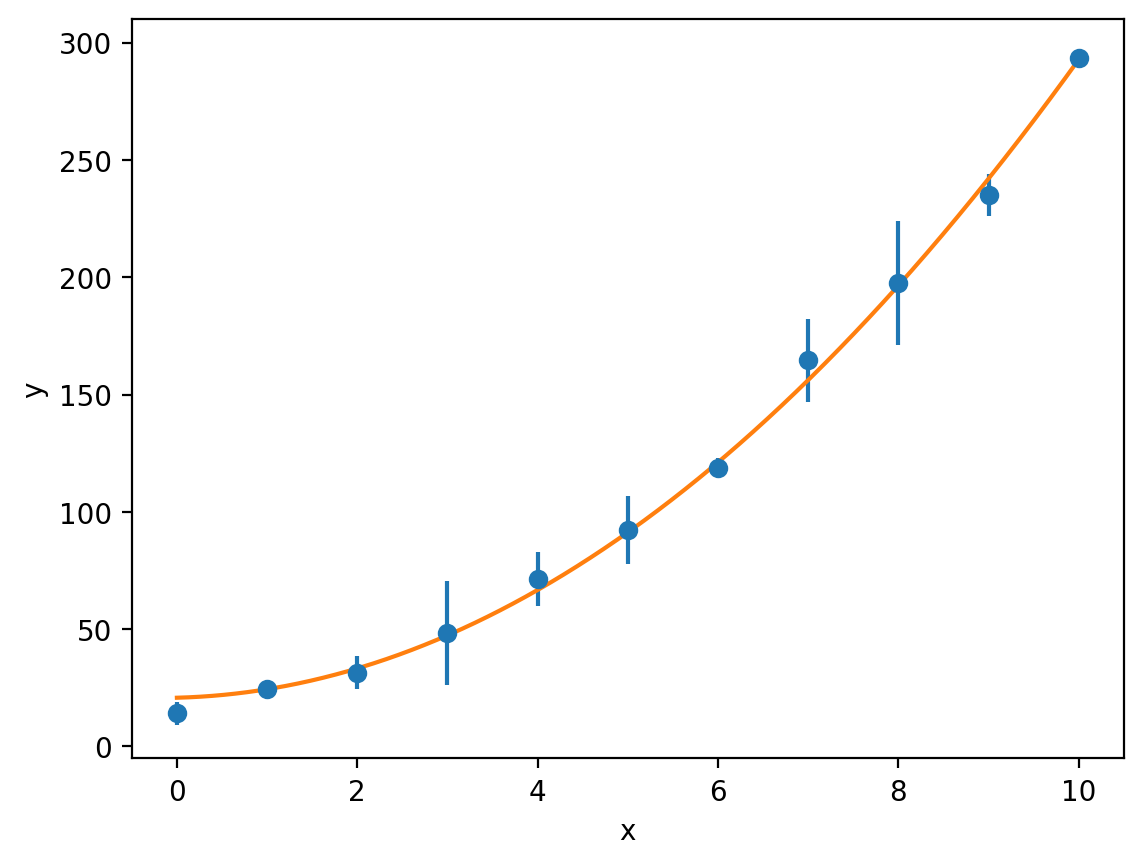

a = 2.6203290628912357 +/- 0.11135727811690121
b = 1.004427811427982 +/- 1.1823802596729307
c = 20.73956461930132 +/- 1.2261305170507053


In [8]:
optimised_parameters, covariance_matrix = curve_fit(quadratic, x, y, sigma=y_err)
a, b, c = optimised_parameters
y_model = quadratic(x_model, a, b, c)

plt.errorbar(x, y, y_err, fmt='o', label='Experimental data')
plt.plot(x_model, y_model, label='Quadratic model')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

a_error = np.sqrt(covariance_matrix[0,0])
b_error = np.sqrt(covariance_matrix[1,1])
c_error = np.sqrt(covariance_matrix[2,2])

print(f'a = {a} +/- {a_error}')
print(f'b = {b} +/- {b_error}')
print(f'c = {c} +/- {c_error}')

## Linearising data

We're going to take a look at a concrete example in chemistry now, so as to demonstrate the advantages of using Python to fit models to our data rather than something like Excel.

Consider the following reaction:

$$2\mathrm{NO}_{2} \rightarrow 2\mathrm{NO} + \mathrm{O}_{2}.$$

If we carry out a set of experiments to measure the rate constant $k$ at a range of different temperatures, then we can fit the Arrhenius equation to our data to calculate the activation energy $E_{a}$ (and the prefactor $A$) for this reaction:

$$k = A\exp\left[\frac{-E_{a}}{RT}\right],$$

where $R$ is the gas constant and $T$ is the temperature.

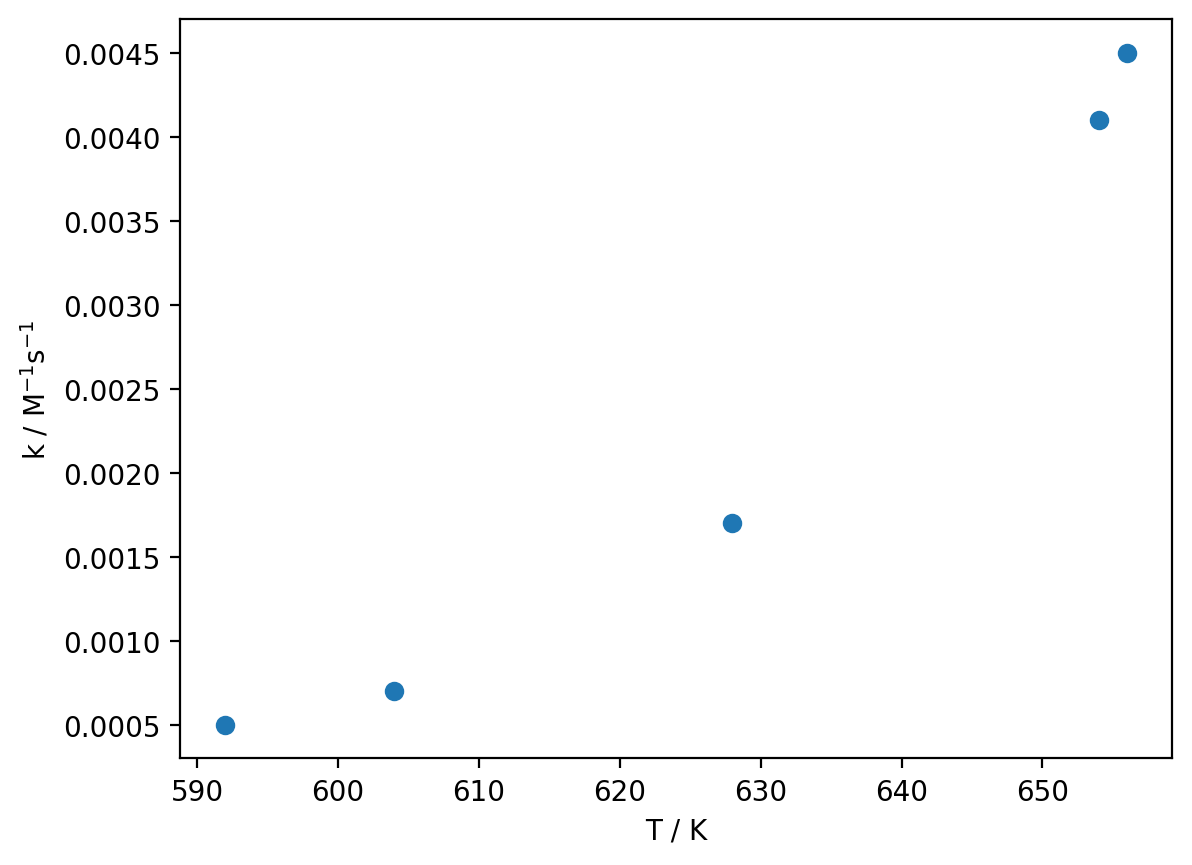

In [9]:
T, k = np.loadtxt('arrhenius.dat', unpack=True)

plt.plot(T, k, 'o')
plt.xlabel('T / K')
plt.ylabel('k / M$^{-1}$s$^{-1}$')

plt.show()

You can download arrhenius.dat [here](https://raw.githubusercontent.com/pythoninchemistry/ch12004/main/CH12004/lab_6/arrhenius.dat).

Imagine for a moment that we were doing this in Excel, which cannot fit non-linear data (in any meaningful sense). We would have to **linearise our data** which, as we will see shortly, is in general **a terrible idea**:

$$\ln k = \ln A - \frac{E_{a}}{RT},$$

so let's simulate that process in Python:

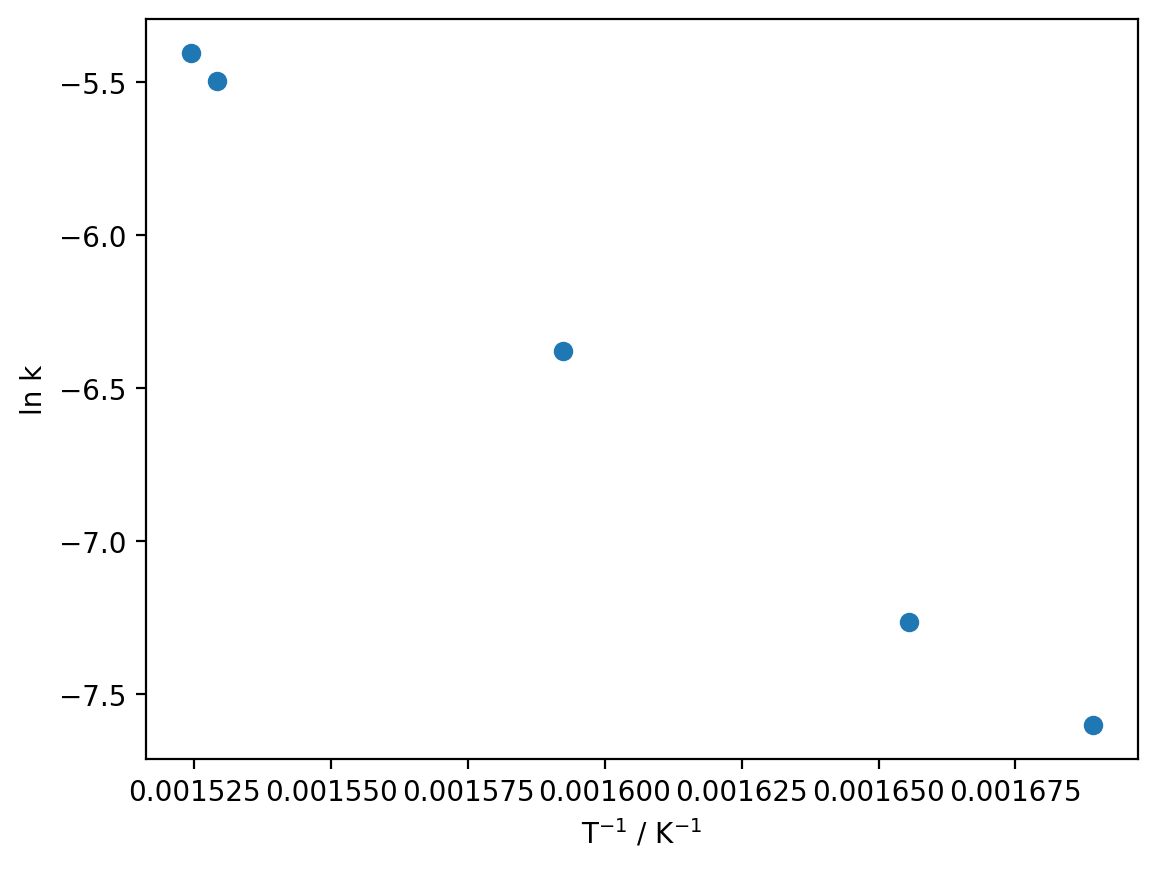

In [10]:
reciprocal_T = 1 / T
ln_k = np.log(k)

plt.plot(reciprocal_T, ln_k, 'o')
plt.xlabel('T$^{-1}$ / K$^{-1}$')
plt.ylabel('ln k')

plt.show()

Now we can use the `linregress` function to compute the value of the slope and the intercept:

In [11]:
from scipy.stats import linregress

regression_data = linregress(reciprocal_T, ln_k)

print(f'm = {regression_data.slope}')
print(f'c = {regression_data.intercept}')

m = -13509.355973303444
c = 15.161037389899018


If we look at the linearised first-order rate equation, we can determine what the slope and intercept correspond to:

$$m = -k,$$

$$c = \ln [\mathrm{H}_{2}\mathrm{O}_{2}]_{0}.$$

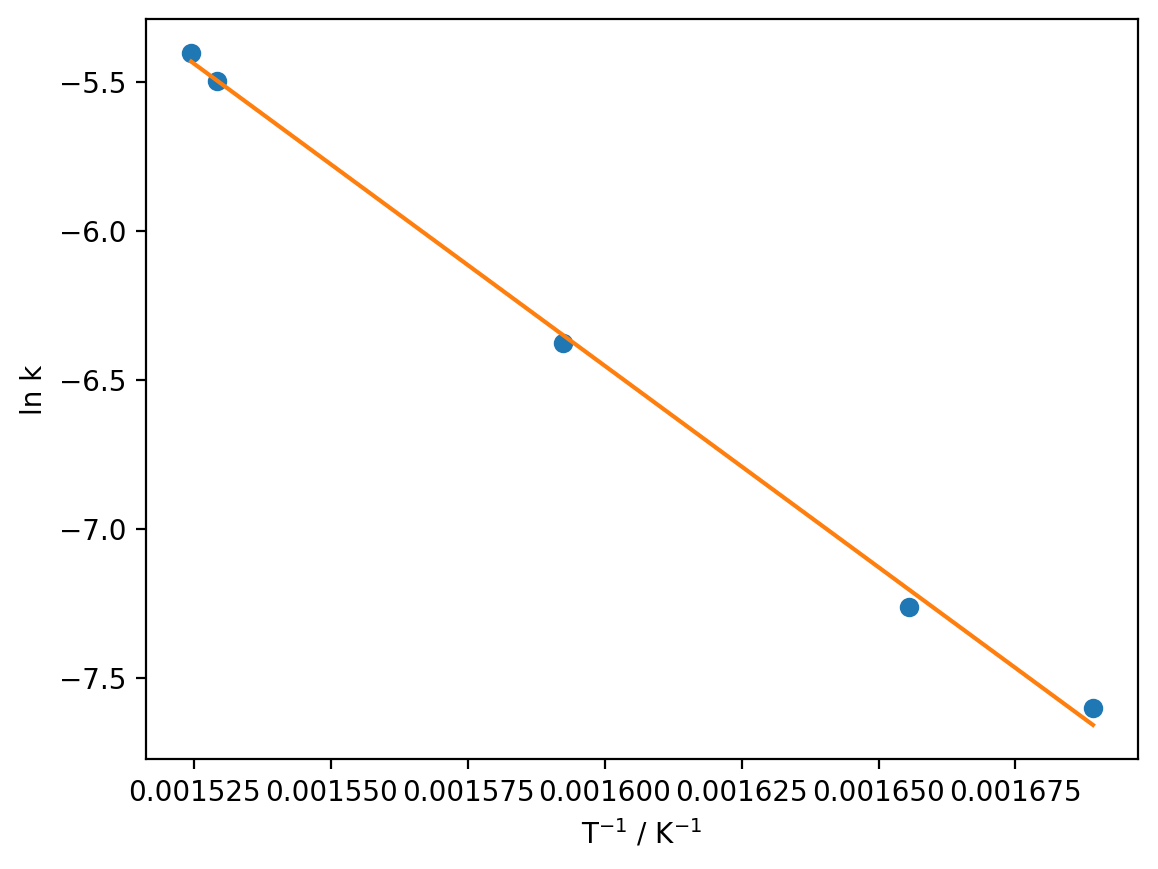

E_a = 112323.03523328649 Jmol-1 = 112.32303523328649 kJmol-1
A = 3840209.1525825486 M-1s-1


In [12]:
from scipy.constants import R

ln_k_model = regression_data.slope * reciprocal_T + regression_data.intercept

plt.plot(reciprocal_T, ln_k, 'o')
plt.plot(reciprocal_T, ln_k_model)
plt.xlabel('T$^{-1}$ / K$^{-1}$')
plt.ylabel('ln k')

plt.show()

E_a = -R * regression_data.slope
A = np.exp(regression_data.intercept)

print(f'E_a = {E_a} J mol-1 = {E_a / 1000} kJ mol-1')
print(f'A = {A} M-1s-1')

Okay great, we have values for $E_{a}$ and $A$. If you are new to Python, you may well be thinking at this point "Why bother doing this in Python if I can do the same thing in Excel?" Well, without being exhaustive, there is one **major** problem with the approach we have taken above:

```{important}
Linearising your data before performing ordinary least-squares regression actually **biases** your optimised parameters (here $E_{a}$ and $A$). In other words, there is an **intrinsic error** in the optimised parameters introduced by linearising your data.
```

If you are curious about the origins of this bias, click [here](https://pubs.acs.org/doi/10.1021/acs.jchemed.3c00466) for a link to a relevant publication on the subject.

## Avoiding linearisation

So, how can we avoid this problem? As you may already have surmised, we have already seen the solution to this problem: **we do not have to linearise our data in the first place**. In Python, we can use the `curve_fit` function to fit **non-linear** data, thus sidestepping the problems associated with linearisation. If we want to use `curve_fit`, we have to define a function to represent the model we would like to fit, here the (non-linear form of the) Arrhenius equation:

E_a = 116196.43205969101 Jmol-1 = 116.196432059691 kJmol-1
A = 7934408.948526503 M-1s-1


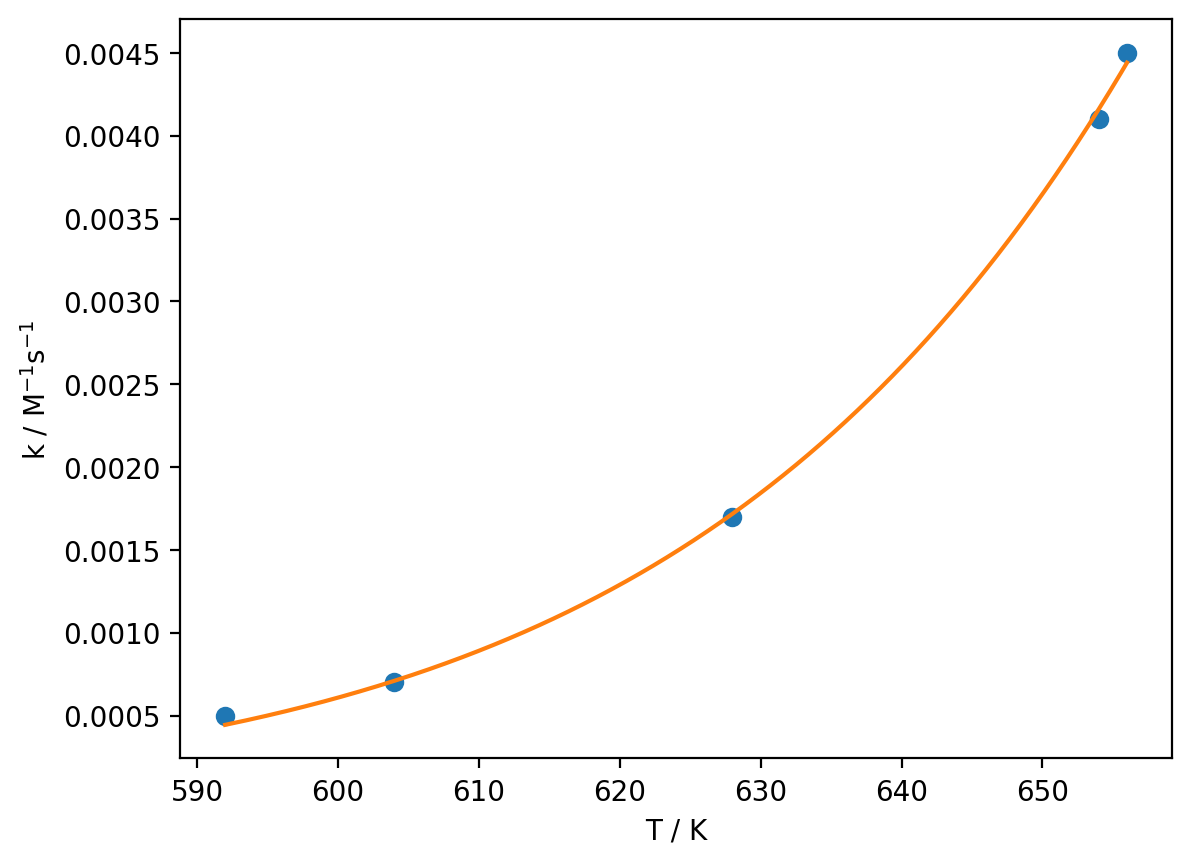

In [13]:
def arrhenius(T, E_a, A):
    """"Calculate the rate constant at a range of temperatures
    using the Arrhenius equation k = A exp[-E_a/RT]

    Args:
        T (np.ndarray): A numpy array containing the temperatures at which to calculate k.
        E_a (float): The activation energy for the reaction (in J mol-1).
        A (float): The prefactor in the Arrhenius equation.

    Returns:
        np.ndarray: The rate constant k evaluated at each temperature.
        
    """

    return A * np.exp(-E_a / (R * T))

optimised_parameters, covariance_matrix = curve_fit(arrhenius, T, k)
E_a, A = optimised_parameters

T_model = np.linspace(min(T), max(T), 1000)
k_model = arrhenius(T_model, E_a, A)

plt.plot(T, k, 'o')
plt.plot(T_model, k_model)
plt.xlabel('T / K')
plt.ylabel('k / M$^{-1}$s$^{-1}$')

print(f'E_a = {E_a} J mol-1 = {E_a / 1000} kJ mol-1')
print(f'A = {A} M-1s-1')